# These are all tentative pa pooooo tapusin ko bukasss hihiiii

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fredapi import Fred
import calendar
import holidays

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [3]:

# Read the CSV file
file_path = 'data/melted.csv'
df_cleaned = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df_cleaned

,Unnamed: 0,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,date,price
0,0,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,2020-01-15,36.80
1,1,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,2020-02-15,36.80
2,2,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,2020-03-15,36.80
3,3,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,2020-04-15,36.80
4,4,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,2020-05-15,36.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100135,100135,Region XIII,Surigao del Sur,Surigao del Sur,9.056504,126.196915,vegetables and fruits,Squashes,KG,actual,Retail,PHP,2024-08-15,32.50
100136,100136,Region XIII,Surigao del Sur,Surigao del Sur,9.056504,126.196915,vegetables and fruits,Squashes,KG,actual,Retail,PHP,2024-09-15,32.50
100137,100137,Region XIII,Surigao del Sur,Surigao del Sur,9.056504,126.196915,vegetables and fruits,Squashes,KG,actual,Retail,PHP,2024-10-15,35.63
100138,100138,Region XIII,Surigao del Sur,Surigao del Sur,9.056504,126.196915,vegetables and fruits,Squashes,KG,actual,Retail,PHP,2024-11-15,35.63


In [4]:
# Convert the date column to datetime format without the time component
df_cleaned['date'] = pd.to_datetime(df_cleaned['date']).dt.date

In [5]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100140 entries, 0 to 100139
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  100140 non-null  int64  
 1   admin1      100140 non-null  object 
 2   admin2      100140 non-null  object 
 3   market      100140 non-null  object 
 4   latitude    100140 non-null  float64
 5   longitude   100140 non-null  float64
 6   category    100140 non-null  object 
 7   commodity   100140 non-null  object 
 8   unit        100140 non-null  object 
 9   priceflag   100140 non-null  object 
 10  pricetype   100140 non-null  object 
 11  currency    100140 non-null  object 
 12  date        100140 non-null  object 
 13  price       100140 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 10.7+ MB


In [36]:
for column in df_cleaned.columns:
    unique_values = df_cleaned[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print(f"Number of Unique Values: {len(unique_values)}\n")

Column: Unnamed: 0
Unique Values: [     0      1      2 ... 100137 100138 100139]
Number of Unique Values: 100140

Column: admin1
Unique Values: ['Autonomous region in Muslim Mindanao' 'Cordillera Administrative region'
 'National Capital region' 'Region I' 'Region II' 'Region III'
 'Region IV-A' 'Region IV-B' 'Region IX' 'Region V' 'Region VI'
 'Region VII' 'Region VIII' 'Region X' 'Region XI' 'Region XII'
 'Region XIII']
Number of Unique Values: 17

Column: admin2
Unique Values: ['Basilan' 'Lanao del Sur' 'Maguindanao' 'Sulu' 'Tawi-Tawi' 'Abra'
 'Apayao' 'Benguet' 'Ifugao' 'Kalinga' 'Mountain Province'
 'Metropolitan Manila' 'Ilocos Norte' 'Ilocos Sur' 'La Union' 'Pangasinan'
 'Cagayan' 'Isabela' 'Nueva Vizcaya' 'Quirino' 'Aurora' 'Bataan' 'Bulacan'
 'Nueva Ecija' 'Tarlac' 'Zambales' 'Batangas' 'Cavite' 'Laguna' 'Quezon'
 'Rizal' 'Marinduque' 'Occidental Mindoro' 'Oriental Mindoro' 'Palawan'
 'Romblon' 'Zamboanga Sibugay' 'Zamboanga del Norte' 'Zamboanga del Sur'
 'Albay' 'Camarines 

# Exploratory Data Analysis

In [50]:
df_cleaned.columns

Index(['Unnamed: 0', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'date', 'price', 'year'],
      dtype='object')

In [6]:
# Summary Statistics
summary_stats = df_cleaned.describe().round(2)
summary_stats

,Unnamed: 0,latitude,longitude,price
count,100140.00,100140.00,100140.00,100140.00
mean,50069.50,11.92,122.85,129.43
std,28908.07,3.55,1.89,122.30
min,0.00,5.03,118.74,5.33
25%,25034.75,8.61,121.09,46.66
50%,50069.50,11.71,122.76,92.50
75%,75104.25,14.84,124.65,170.00
max,100139.00,18.19,126.21,1166.00


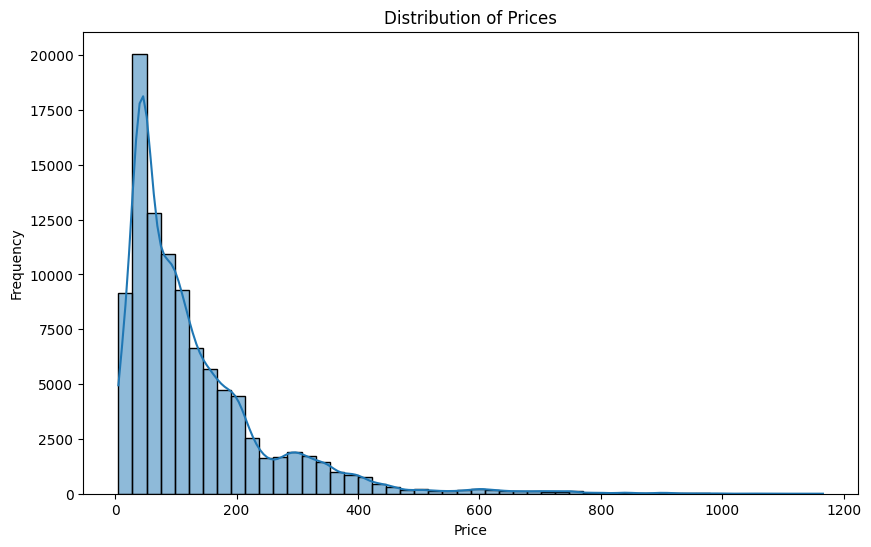

In [7]:
import seaborn as sns

# Distribution of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### **Histogram Analysis of Commodity Prices**
The histogram shows a **right-skewed distribution**, where most prices are concentrated at the lower end, with fewer high-priced commodities. The **KDE line** highlights this trend, indicating that **lower prices are more common**, while higher prices occur less frequently.


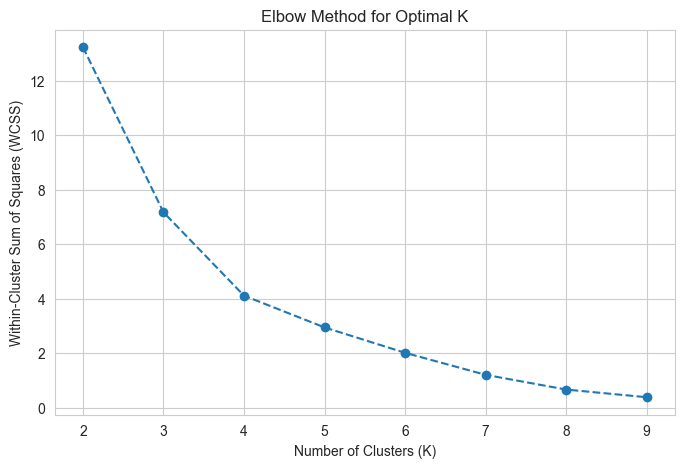

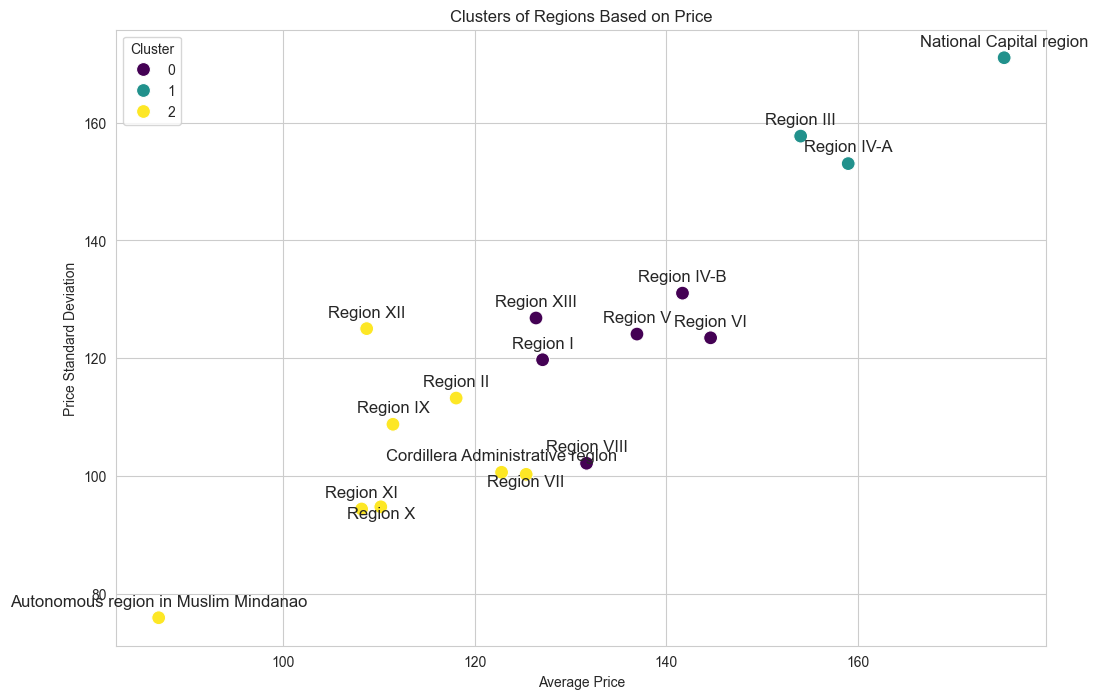

Cluster 2:
 - Autonomous region in Muslim Mindanao
 - Cordillera Administrative region
 - Region II
 - Region IX
 - Region VII
 - Region X
 - Region XI
 - Region XII


Cluster 1:
 - National Capital region
 - Region III
 - Region IV-A


Cluster 0:
 - Region I
 - Region IV-B
 - Region V
 - Region VI
 - Region VIII
 - Region XIII




In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Group by region (admin1) and compute average commodity price per region
region_prices = df_cleaned.groupby("admin1").agg({"price": ["mean", "std"]}).reset_index()
region_prices.columns = ["Region", "Avg_Price", "Price_StdDev"]

# Replace "Cordillera Administrative Region" with "CAR" and "Autonomous Region in Muslim Mindanao" with "ARMM"
region_prices["Region"] = region_prices["Region"].replace({
    "Cordillera Administrative Region": "CAR",
    "Autonomous Region in Muslim Mindanao": "ARMM"
})

# Fill missing values (replace NaNs with column mean)
region_prices[["Avg_Price", "Price_StdDev"]] = region_prices[["Avg_Price", "Price_StdDev"]].fillna(region_prices[["Avg_Price", "Price_StdDev"]].mean())

# Standardize the numerical features for better clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(region_prices[["Avg_Price", "Price_StdDev"]])

# Finding the optimal K using the Elbow Method
wcss = []
K_range = range(2, 10)  # Trying K from 2 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Choose optimal K (adjust based on the elbow method)
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
region_prices["Cluster"] = kmeans.fit_predict(scaled_features)

# Scatterplot of clusters with region labels
plt.figure(figsize=(12, 8))
sns.scatterplot(data=region_prices, x="Avg_Price", y="Price_StdDev", hue="Cluster", palette="viridis", s=100)
plt.title("Clusters of Regions Based on Price")
plt.xlabel("Average Price")
plt.ylabel("Price Standard Deviation")
plt.legend(title="Cluster")

# Add labels for each region
for i in range(region_prices.shape[0]):
    region = region_prices["Region"][i]
    if region in ["Region X", "Region VII"]:
        plt.text(region_prices["Avg_Price"][i], region_prices["Price_StdDev"][i] - 2, region, fontsize=12, ha='center')
    else:
        plt.text(region_prices["Avg_Price"][i], region_prices["Price_StdDev"][i] + 2, region, fontsize=12, ha='center')

plt.show()

# Print regions grouped by their cluster labels
for cluster in region_prices['Cluster'].unique():
    print(f"Cluster {cluster}:")
    regions_in_cluster = region_prices[region_prices['Cluster'] == cluster]['Region'].tolist()
    for region in regions_in_cluster:
        print(f" - {region}")
    print("\n")

# Merge latitude & longitude from df_cleaned
location_data = df_cleaned.groupby("admin1")[["latitude", "longitude"]].mean().reset_index()
region_prices = region_prices.merge(location_data, left_on="Region", right_on="admin1", how="left")

# Generate an interactive map
m = folium.Map(location=[df_cleaned["latitude"].mean(), df_cleaned["longitude"].mean()], zoom_start=6)
colors = ["red", "blue", "green", "purple", "orange"]

for _, row in region_prices.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5,
        color=colors[row["Cluster"]],
        fill=True,
        fill_color=colors[row["Cluster"]],
        fill_opacity=0.7,
        popup=f"{row['Region']} - Cluster {row['Cluster']}"
    ).add_to(m)

m.save("region_clusters.html")  # Save map as HTML file

### **Elbow Method Interpretation**
- **X-axis:** Number of clusters (K).  
- **Y-axis:** Within-Cluster Sum of Squares (WCSS), representing variance within clusters.  
- **Elbow Point:** The point where WCSS stops decreasing significantly, indicating the optimal K.  

### **Findings:**  
- **Sharp WCSS Drop (K=2 to K=3):** Significant variance reduction.  
- **Slower Decrease Beyond K=3:** Forms an "elbow" at K=3.  
- **Optimal K = 3:** Balances variance reduction and model simplicity.  

This suggests that using **3 clusters** effectively groups the data while maintaining interpretability. 📊  


### **Regional Clustering Analysis (K-Means)**
The scatter plot visualizes regional clustering based on **average price** and **price variability**, using K-Means. The **Elbow Method** determines the optimal number of clusters.  

### **Cluster Interpretations:**  
- **Cluster 0 (Purple):** Moderate prices & variability → Balanced market.  
- **Cluster 1 (Teal):** High prices & variability → Market fluctuations or supply-demand imbalances.  
- **Cluster 2 (Yellow):** Low prices & stability → Steady supply chain with minimal volatility.  

This analysis provides insights into **regional market dynamics**, aiding in **pricing strategies, supply chain decisions, and policy-making**.


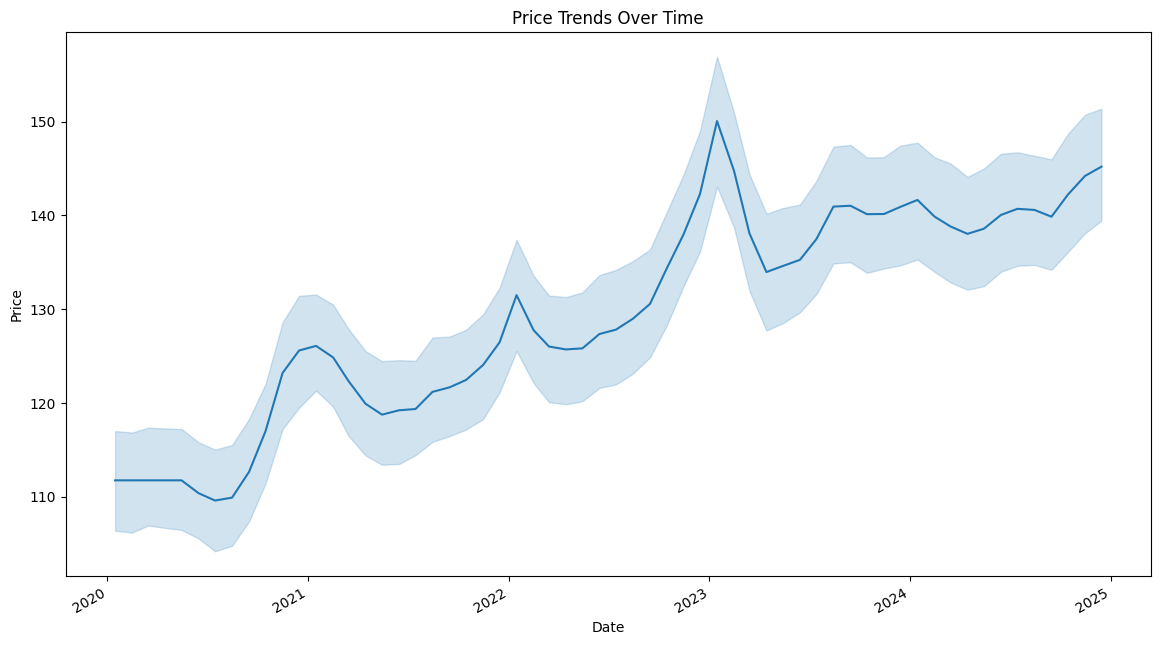

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Price Trends Over Time
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_cleaned, x='date', y='price')
plt.title('Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# Set date format on x-axis to show only the year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Set major ticks every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format date as Year

# Automatically format x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.show()

### **Price Trends Over Time**
- **X-axis (Date):** Represents the period from 2020 to 2025.  
- **Y-axis (Price):** Represents the average commodity price.  

### **Key Observations:**
- **Overall Upward Trend:** Prices have generally increased over time.  
- **Seasonal Fluctuations:** Peaks and troughs suggest cyclical factors.  
- **Significant Peaks:** Sharp increases in early 2021 and mid-2023.  
- **Confidence Interval:** Wider intervals indicate higher price volatility.  

### **Summary:**  
Commodity prices have risen from 2020 to 2025, with periodic fluctuations and notable peaks, likely due to market conditions or external factors.


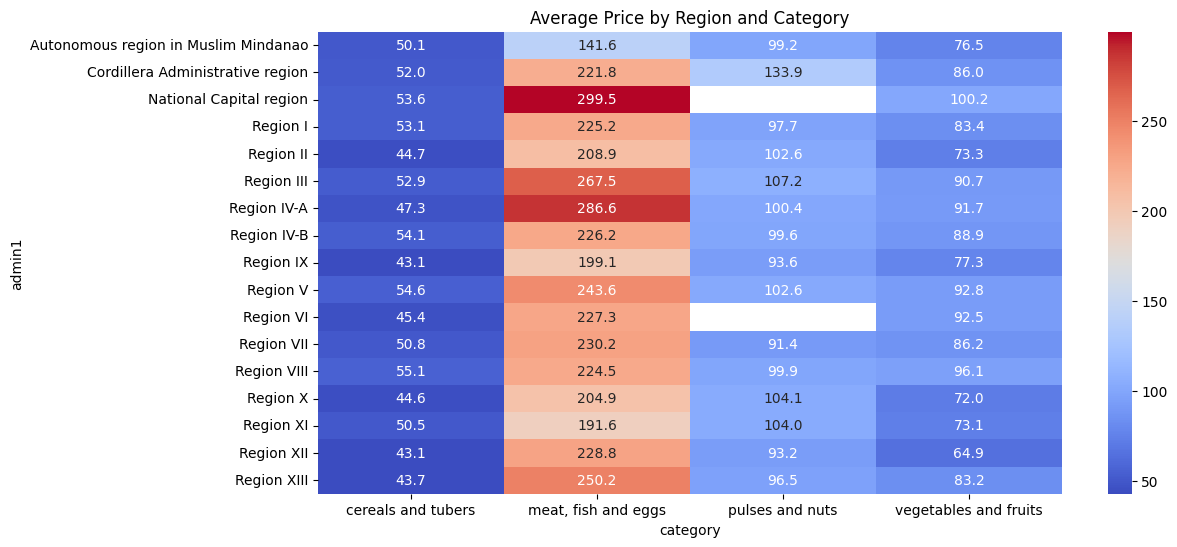

In [10]:
# Heatmap of Prices by Region
plt.figure(figsize=(12, 6))
df_pivot = df_cleaned.pivot_table(index='admin1', columns='category', values='price', aggfunc='mean')
sns.heatmap(df_pivot, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Average Price by Region and Category')
plt.show()

- National Capital Region (NCR): Shows the highest average prices, especially for meat, fish, and eggs.
- Cordillera Administrative Region (CAR) and Region III: Also have relatively high prices for meat, fish, and eggs.
- Regions IX, XII, and XIII: Tend to have lower average prices across most categories.
- Price Variation: There is significant variation in prices across different regions and categories, indicating regional disparities in commodity prices.

In [20]:
df_cleaned1 = df_cleaned.copy()

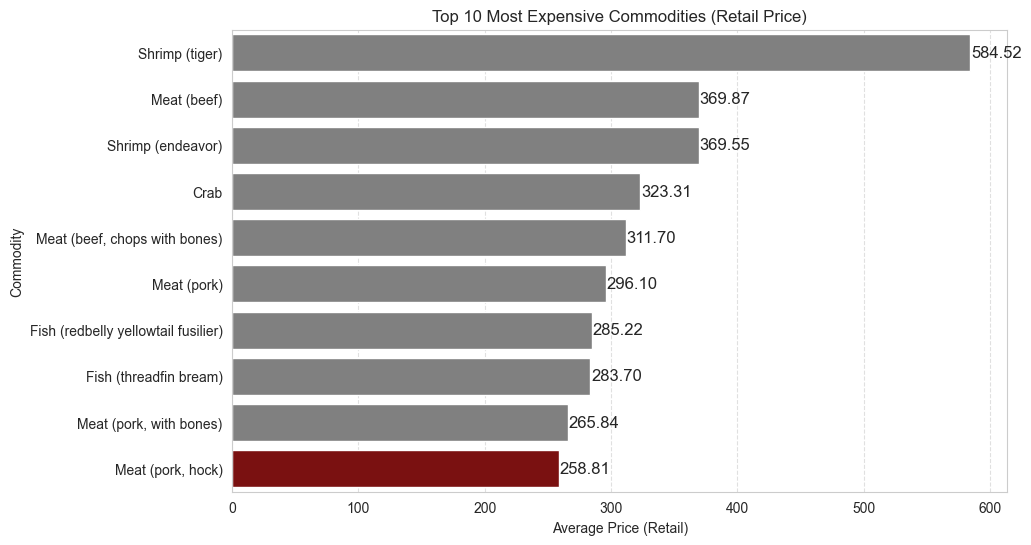

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average prices and select top 10 most expensive commodities
avg_prices = df_cleaned.groupby('commodity')['price'].mean().sort_values(ascending=False).head(10)

# Define color scheme (highlight the most expensive commodity)
colors = ['gray'] * (len(avg_prices) - 1) + ['darkred']  # Dark red for highest price

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_prices, y=avg_prices.index, palette=colors)

# Add price labels to each bar
for index, value in enumerate(avg_prices):
    plt.text(value + 0.5, index, f"{value:.2f}", va='center', fontsize=12)

plt.xlabel('Average Price (Retail)')
plt.ylabel('Commodity')
plt.title('Top 10 Most Expensive Commodities (Retail Price)')
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Light grid for readability

plt.show()


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Compute the average price per commodity within each category
df_avg_price = df_cleaned.groupby(['category', 'commodity'])['price'].mean().reset_index()

# Function to get the top 10 most expensive commodities per category
def get_top_10_expensive(df):
    return df.sort_values(by=['category', 'price'], ascending=[True, False]).groupby('category').head(10)

df_top_10 = get_top_10_expensive(df_avg_price)

# Create a dropdown for category selection
category_dropdown = widgets.Dropdown(
    options=sorted(df_top_10["category"].unique()),
    description="Category:",
    disabled=False
)

# Function to update the plot based on selected category
def update_plot(category):
    df_filtered = df_top_10[df_top_10["category"] == category].sort_values(by="price", ascending=False)

    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")
    
    # Use a better color scheme (coolwarm)
    colors = sns.color_palette("coolwarm", len(df_filtered))

    ax = sns.barplot(
        x=df_filtered["price"], 
        y=df_filtered["commodity"], 
        palette=colors
    )

    # Add price labels inside bars
    for index, value in enumerate(df_filtered["price"]):
        ax.text(value - 0.2, index, f"{value:.2f}", va='center', ha='right', fontsize=11, color="white", fontweight="bold")

    # Formatting
    plt.xlabel("Average Price (Retail)", fontsize=14, fontweight='bold')
    plt.ylabel("Commodity", fontsize=14, fontweight='bold')
    plt.title(f"Top 10 Most Expensive Commodities in {category}", fontsize=16, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    plt.show()

# Display the dropdown and interactive plot
widgets.interact(update_plot, category=category_dropdown)


interactive(children=(Dropdown(description='Category:', options=('cereals and tubers', 'meat, fish and eggs', …

<function __main__.update_plot(category)>

In [57]:
df_cleaned['commodity'].unique()

array(['Rice (regular, milled)', 'Rice (special)', 'Rice (well milled)',
       'Sweet potatoes', 'Taro', 'Anchovies', 'Eggs', 'Fish (roundscad)',
       'Beans (mung)', 'Beans (string)', 'Bitter melon', 'Cabbage',
       'Coconut', 'Garlic', 'Ginger', 'Onions (white)', 'Squashes',
       'Fish (tilapia)', 'Bananas (lakatan)', 'Choko', 'Onions (red)',
       'Semolina (yellow)', 'Fish (milkfish)', 'Meat (pork, with bones)',
       'Shrimp (tiger)', 'Bananas (latundan)', 'Bottle gourd',
       'Calamansi', 'Carrots', 'Eggplants', 'Mangoes (piko)',
       'Fish (redbelly yellowtail fusilier)', 'Meat (chicken, whole)',
       'Mangoes (carabao)', 'Meat (beef)', 'Potatoes (Irish)',
       'Beans (green, fresh)', 'Pineapples', 'Meat (pork)',
       'Groundnuts (shelled)', 'Fish (frigate tuna)', 'Fish (slipmouth)',
       'Fish (threadfin bream)', 'Tomatoes', 'Water spinach',
       'Bananas (saba)', 'Crab', 'Shrimp (endeavor)', 'Cabbage (chinese)',
       'Eggs (duck)', 'Maize (yellow)', 'S

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Ensure 'date' column is in datetime format
df_cleaned["date"] = pd.to_datetime(df_cleaned["date"])

# Define priority commodities based on the most commonly consumed food in the Philippines
priority_commodities = [
    "Rice (regular, milled)", "Rice (special)", "Rice (well milled)", "Onions (red)", "Onions (white)", "Garlic", 
    "Eggs", "Meat (pork)", "Meat (chicken, whole)", "Tomatoes", "Eggplants", 
    "Bananas (lakatan)", "Bananas (latundan)", "Bananas (saba)"
]

# Dropdown for commodity selection
commodity_dropdown = widgets.Dropdown(
    options=priority_commodities,
    description="Commodity:",
    style={'description_width': 'initial'}
)

# Function to plot inflation rate
def plot_inflation(commodity):
    df_filtered = df_cleaned[(df_cleaned["commodity"] == commodity) & (df_cleaned["date"].dt.year < 2025)].copy()
    
    if df_filtered.empty:
        print("No data available for this commodity.")
        return
    
    df_filtered["year"] = df_filtered["date"].dt.year
    df_yearly = df_filtered.groupby("year", as_index=False)["price"].mean()
    df_yearly["inflation_rate"] = df_yearly["price"].pct_change() * 100

    # Plot inflation rate over time
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df_yearly, x="year", y="inflation_rate", marker="o", linewidth=2, color="red")

    plt.xlabel("Year", fontsize=12, fontweight="bold")
    plt.ylabel("Inflation Rate (%)", fontsize=12, fontweight="bold")
    plt.title(f"Inflation Rate of '{commodity}' Over Time", fontsize=14, fontweight="bold")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# Create an interactive widget
widgets.interactive(plot_inflation, commodity=commodity_dropdown)


interactive(children=(Dropdown(description='Commodity:', options=('Rice (regular, milled)', 'Rice (special)', …

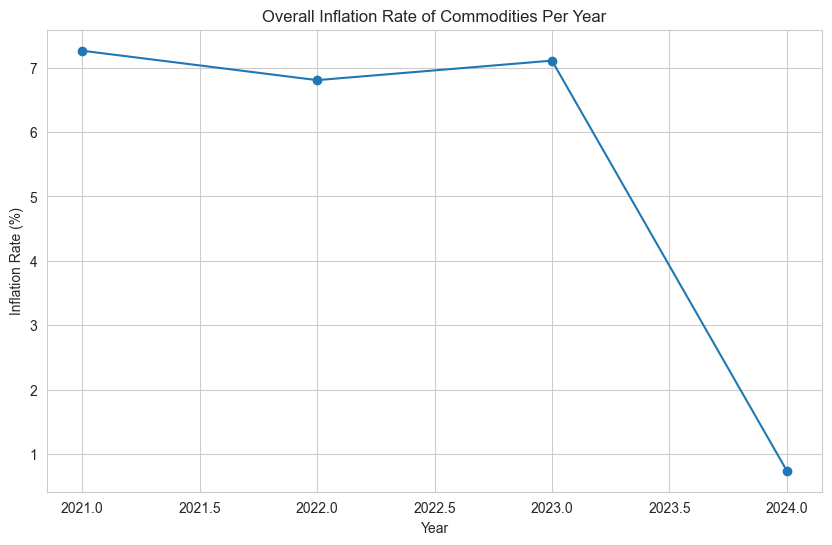

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the date column is in datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Extract the year from the date column
df_cleaned['year'] = df_cleaned['date'].dt.year

# Calculate the average price per year
avg_price_per_year = df_cleaned.groupby('year')['price'].mean().reset_index()

# Calculate the year-over-year inflation rate
avg_price_per_year['inflation_rate'] = avg_price_per_year['price'].pct_change() * 100

# Drop the first row with NaN inflation rate
avg_price_per_year = avg_price_per_year.dropna()

# Plot the inflation rate
plt.figure(figsize=(10, 6))
plt.plot(avg_price_per_year['year'], avg_price_per_year['inflation_rate'], marker='o', linestyle='-')
plt.title('Overall Inflation Rate of Commodities Per Year')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.show()

c:\Users\Mark Joseph Nicasio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Mark Joseph Nicasio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Mark Joseph Nicasio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Mark Jo

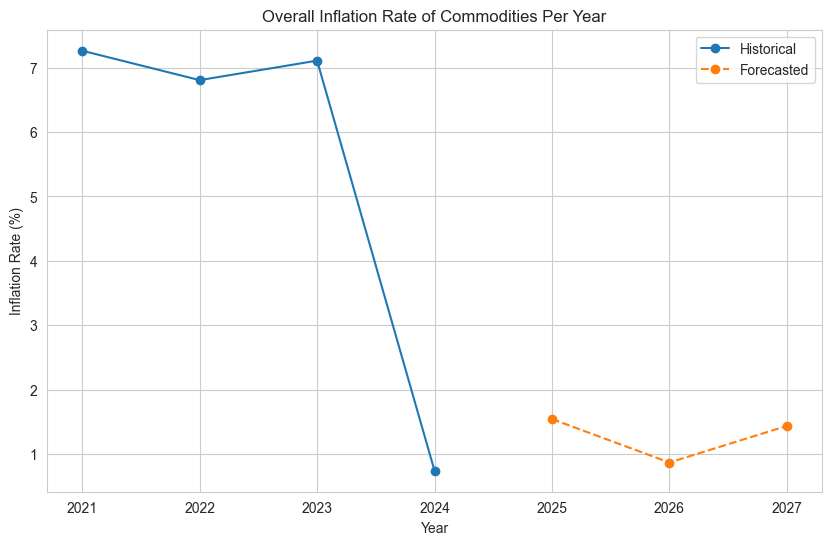

   year  inflation_rate
4  2025        1.543517
5  2026        0.868666
6  2027        1.436284


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ensure the date column is in datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# Extract the year from the date column
df_cleaned['year'] = df_cleaned['date'].dt.year

# Calculate the average price per year
avg_price_per_year = df_cleaned.groupby('year')['price'].mean().reset_index()

# Calculate the year-over-year inflation rate
avg_price_per_year['inflation_rate'] = avg_price_per_year['price'].pct_change() * 100

# Drop the first row with NaN inflation rate
avg_price_per_year = avg_price_per_year.dropna()

# Fit the ARIMA model
model = ARIMA(avg_price_per_year['inflation_rate'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the inflation rate for the next 3 years
forecast = model_fit.forecast(steps=3)
forecast_years = [avg_price_per_year['year'].max() + i for i in range(1, 4)]

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'year': forecast_years, 'inflation_rate': forecast})

# Plot the historical and forecasted inflation rates
plt.figure(figsize=(10, 6))
plt.plot(avg_price_per_year['year'], avg_price_per_year['inflation_rate'], marker='o', linestyle='-', label='Historical')
plt.plot(forecast_df['year'], forecast_df['inflation_rate'], marker='o', linestyle='--', label='Forecasted')
plt.title('Overall Inflation Rate of Commodities Per Year')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Display the forecasted inflation rates
print(forecast_df)

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import ipywidgets as widgets
from IPython.display import display
import warnings
from sklearn.metrics import r2_score

# Suppress warnings
warnings.filterwarnings("ignore")

# Ensure 'date' column is in datetime format
df_cleaned["date"] = pd.to_datetime(df_cleaned["date"])

# Define priority commodities based on the most commonly consumed food in the Philippines
priority_commodities = [
    "Rice (regular, milled)", "Rice (special)", "Rice (well milled)"
]

# Dropdown for commodity selection
commodity_dropdown = widgets.Dropdown(
    options=priority_commodities,
    description="Commodity:",
    style={'description_width': 'initial'}
)

# Function to plot and predict inflation rate
def plot_and_predict_inflation(commodity):
    df_filtered = df_cleaned[(df_cleaned["commodity"] == commodity) & (df_cleaned["date"].dt.year < 2025)].copy()
    
    if df_filtered.empty:
        print("No data available for this commodity.")
        return
    
    df_filtered["year"] = df_filtered["date"].dt.year
    df_yearly = df_filtered.groupby("year", as_index=False)["price"].mean()
    df_yearly["inflation_rate"] = df_yearly["price"].pct_change() * 100

    # Drop the first row with NaN inflation rate
    df_yearly = df_yearly.dropna()

    # Fit the ARIMA model
    model = ARIMA(df_yearly['inflation_rate'], order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast the inflation rate for the next 3 years
    forecast = model_fit.forecast(steps=3)
    forecast_years = [df_yearly['year'].max() + i for i in range(1, 4)]

    # Create a DataFrame for the forecasted values
    forecast_df = pd.DataFrame({'year': forecast_years, 'inflation_rate': forecast})

    # Combine historical and forecasted data for continuous line plot
    combined_df = pd.concat([df_yearly, forecast_df], ignore_index=True)

    # Plot the historical and forecasted inflation rates
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df_yearly, x="year", y="inflation_rate", marker="o", linewidth=2, color="blue", label="Historical")
    sns.lineplot(data=forecast_df, x="year", y="inflation_rate", marker="o", linewidth=2, linestyle="--", color="red", label="Forecasted")

    plt.xlabel("Year", fontsize=12, fontweight="bold")
    plt.ylabel("Inflation Rate (%)", fontsize=12, fontweight="bold")
    plt.title(f"Inflation Rate of '{commodity}' Over Time", fontsize=14, fontweight="bold")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # Display the forecasted inflation rates
    print(forecast_df)

    # Calculate and print the accuracy (R²)
    historical_inflation = df_yearly['inflation_rate'].values
    predicted_inflation = model_fit.predict(start=0, end=len(historical_inflation)-1)
    r2 = r2_score(historical_inflation, predicted_inflation)
    print(f"R-squared (R²): {r2:.2f}")

# Create an interactive widget
widgets.interactive(plot_and_predict_inflation, commodity=commodity_dropdown)

interactive(children=(Dropdown(description='Commodity:', options=('Rice (regular, milled)', 'Rice (special)', …

In [68]:
# Define the cutoff date for the pandemic period
pandemic_end_date = pd.to_datetime('2023-05-31')

# Create the 'status' column based on the date
df_cleaned['status'] = np.where(df_cleaned['date'] <= pandemic_end_date, 'pandemic', 'post-pandemic')

# Display the first few rows to verify the new column
df_cleaned.head()

,Unnamed: 0,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,date,price,year,status
0,0,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,2020-01-15,36.8,2020,pandemic
1,1,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,2020-02-15,36.8,2020,pandemic
2,2,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,2020-03-15,36.8,2020,pandemic
3,3,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,2020-04-15,36.8,2020,pandemic
4,4,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,2020-05-15,36.8,2020,pandemic


In [69]:
# Create a new column 'season' based on the month
df_cleaned['season'] = df_cleaned['date'].dt.month.apply(lambda x: 'dry' if x in [11, 12, 1, 2, 3, 4] else 'wet')

# Display the first few rows to verify the new column
df_cleaned.head()

,Unnamed: 0,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,date,price,year,status,season
0,0,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,2020-01-15,36.8,2020,pandemic,dry
1,1,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,2020-02-15,36.8,2020,pandemic,dry
2,2,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,2020-03-15,36.8,2020,pandemic,dry
3,3,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,2020-04-15,36.8,2020,pandemic,dry
4,4,Autonomous region in Muslim Mindanao,Basilan,Basilan,6.663056,122.136111,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,2020-05-15,36.8,2020,pandemic,wet


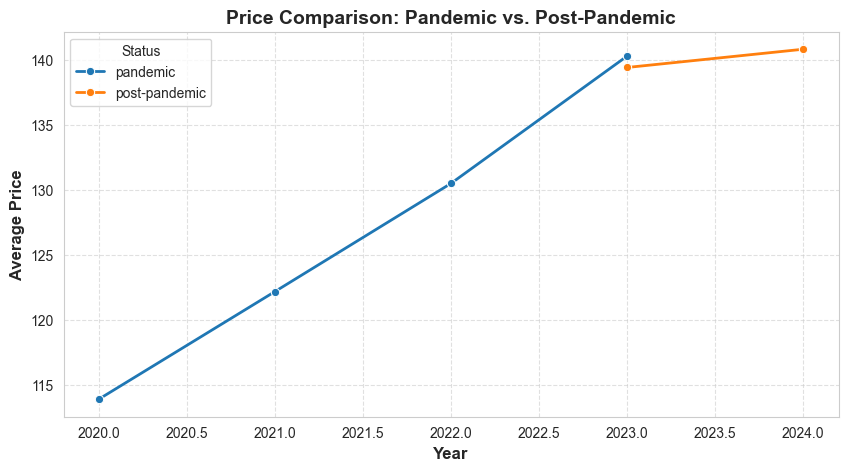

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'date' column is in datetime format
df_cleaned["date"] = pd.to_datetime(df_cleaned["date"])

# Compute average price per year and status
df_status = df_cleaned.groupby(["year", "status"], as_index=False)["price"].mean()

# Plot price comparison between pandemic and post-pandemic periods
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_status, x="year", y="price", hue="status", marker="o", linewidth=2)

plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Average Price", fontsize=12, fontweight="bold")
plt.title("Price Comparison: Pandemic vs. Post-Pandemic", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Status")
plt.show()



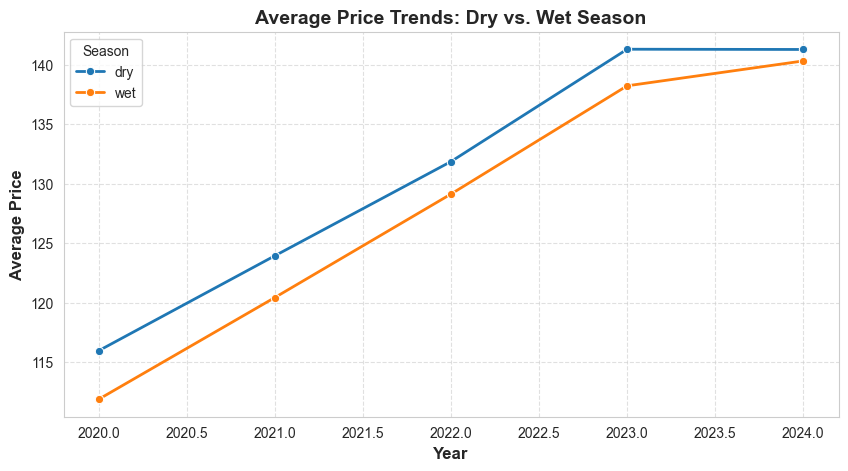

In [71]:
# Compute average price per season and year
df_season = df_cleaned.groupby(["year", "season"], as_index=False)["price"].mean()

# Plot price trends for dry vs. wet season
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_season, x="year", y="price", hue="season", marker="o", linewidth=2)

plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Average Price", fontsize=12, fontweight="bold")
plt.title("Average Price Trends: Dry vs. Wet Season", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Season")
plt.show()


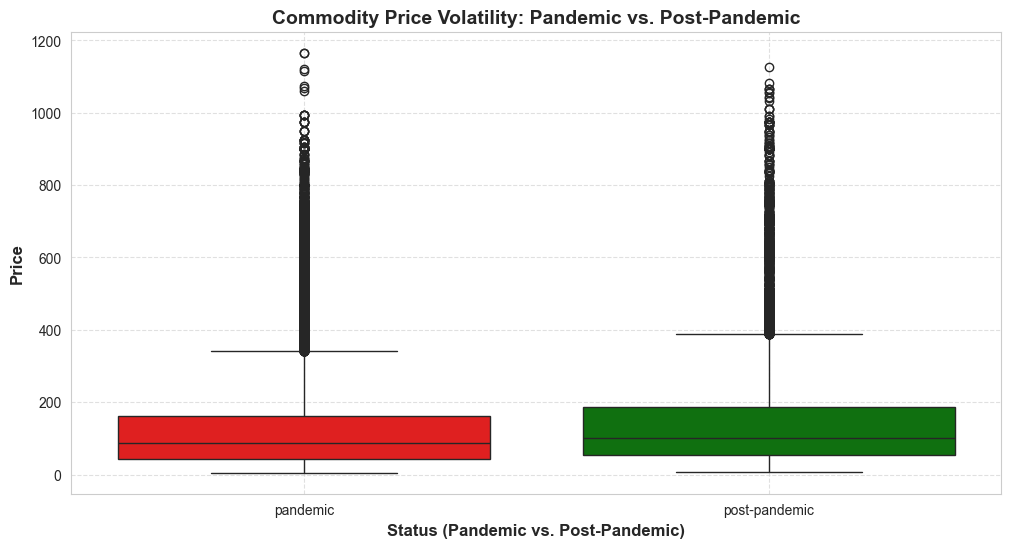

In [72]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x="status", y="price", palette=["red", "green"])

plt.xlabel("Status (Pandemic vs. Post-Pandemic)", fontsize=12, fontweight="bold")
plt.ylabel("Price", fontsize=12, fontweight="bold")
plt.title("Commodity Price Volatility: Pandemic vs. Post-Pandemic", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
